# Analysis

This notebook will be useful on small data sets.

In [1]:
import weibull
%matplotlib inline

c:\program files (x86)\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Create the failure times array and the analysis object.  When the analysis is initialized with data, it creates values for the shape parameter, $\beta$, and the scale parameter, $\eta$.

In [2]:
failure_times = [
    10197.8, 3349.0, 15318.6, 710.7, 20683.2, 
    6976.5, 2590.7, 11351.7, 10177.0, 3738.4
]

analysis = weibull.Analysis(failure_times)
analysis.fit()

print(f'beta: {analysis.beta}\neta: {analysis.eta}')

DEBUG:weibull.weibull:
       data   susp  rank  f_rank  med_rank  rev_rank
4     710.7  False     1       1  0.067308        10
7    2590.7  False     2       2  0.163462         9
2    3349.0  False     3       3  0.259615         8
10   3738.4  False     4       4  0.355769         7
6    6976.5  False     5       5  0.451923         6
9   10177.0  False     6       6  0.548077         5
1   10197.8  False     7       7  0.644231         4
8   11351.7  False     8       8  0.740385         3
3   15318.6  False     9       9  0.836538         2
5   20683.2  False    10      10  0.932692         1


DEBUG:weibull.weibull:beta: 1.12, eta: 9573.82


beta: 1.1177687384111006
eta: 9573.8239736489


Lets check out the probability plot!

c:\program files (x86)\python36-32\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


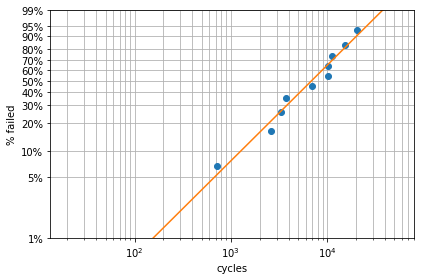

In [3]:
analysis.probplot()

Looks pretty decent in this case.  For completeness, we should look at the fit tests.

In [4]:
analysis.fit_test

DEBUG:weibull.weibull:beta: 1.12, eta: 9573.82


c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>            <td>y</td>        <th>  R-squared:         </th> <td>   0.971</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.968</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   271.5</td>
</tr>
<tr>
  <th>Date:</th>             <td>Fri, 15 Dec 2017</td> <th>  Prob (F-statistic):</th> <td>1.86e-07</td>
</tr>
<tr>
  <th>Time:</th>                 <td>13:35:48</td>     <th>  Log-Likelihood:    </th> <td>  3.9854</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>    10</td>      <th>  AIC:               </th> <td>  -3.971</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>     8</td>      <th>  BIC:               </th> <td>  -3.366</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>     1</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
    <td></td>       <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th> <td>    9.1668</td> <td>    0.064</td> <td>  143.079</td> <td> 0.000</td> <td>    9.019</td> <td>    9.315</td>
</tr>
<tr>
  <th>x1</th>    <td>    0.8946</td> <td>    0.054</td> <td>   16.479</td> <td> 0.000</td> <td>    0.769</td> <td>    1.020</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td> 1.023</td> <th>  Durbin-Watson:     </th> <td>   1.941</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.600</td> <th>  Jarque-Bera (JB):  </th> <td>   0.715</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.303</td> <th>  Prob(JB):          </th> <td>   0.699</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 1.839</td> <th>  Cond. No.          </th> <td>    1.66</td>
</tr>
</table>

# Plotting

The standard suite of plots are included...

c:\program files (x86)\python36-32\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


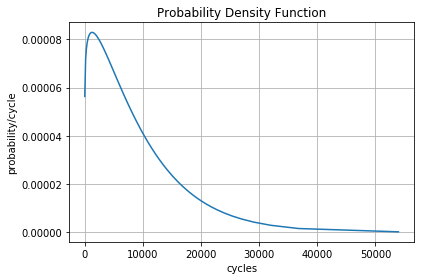

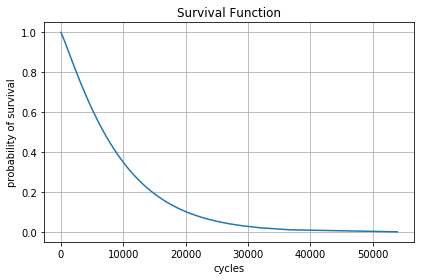

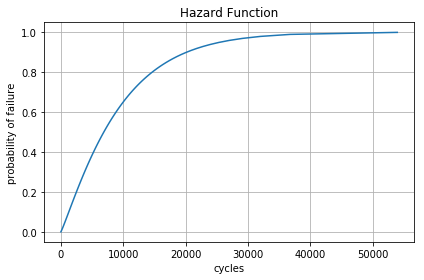

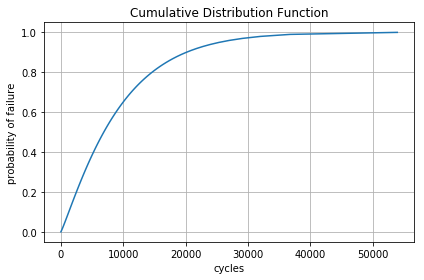

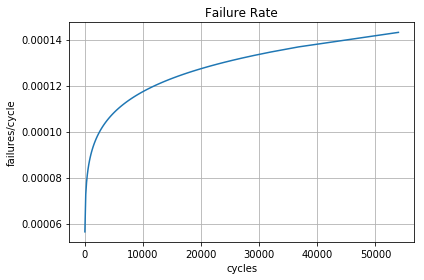

In [5]:
analysis.pdf()
analysis.sf()
analysis.hazard()
analysis.cdf()
analysis.fr()

I realize that there is some overlap in the plots - such as `cdf` and `hazard` - but having all of the functions defined makes it easier for the maximum number of user.

# Summary Data

Some customers insist on metrics such as MTTF, characteristic life, etc., so those are included as well.

Note that `mttf` and `mean` are the same metric.  Also note that `characteristic_life` is the same as `eta`, $\eta$.

In [6]:
print(f'MTTF: {analysis.mttf:.01f}')
print(f'mean life: {analysis.mean:.01f}')
print(f'median life: {analysis.median:.01f}')
print(f'characteristic life: {analysis.characteristic_life:.01f}')

MTTF: 9190.3
mean life: 9190.3
median life: 6897.3
characteristic life: 9573.8
